In [1]:
import redback
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from redback.simulate_transients import SimulateGenericTransient

In [2]:
#one component data simulation
bands = ['lsstg', 'lsstr', 'lssti','lsstz','lssty']
times = np.linspace(0.2, 50, 30) # days
frequency = np.array(redback.utils.bands_to_frequency(bands))
model_kwargs = {'output_format':'flux_density', 'frequency':frequency}
num_of_data_points = 100 # the number of data points to generate

parameters = {}
parameters['redshift'] = 0.01 
#blue
parameters['mej'] = 0.03 #mass ejecta m_sun
parameters['temperature_floor'] = 3000 #min temp of expanding photosphere
parameters['kappa'] = 15 
parameters['vej'] = 0.3 #velocity as frac of c

model = 'one_component_kilonova_model'
kn_obs1 = SimulateGenericTransient(model=model, parameters=parameters,
                                  times=times, data_points=num_of_data_points, model_kwargs=model_kwargs,
                                  multiwavelength_transient=True, noise_term=0.05)
kn_obs2=  SimulateGenericTransient(model=model, parameters=parameters,
                                  times=times, data_points=num_of_data_points, model_kwargs=model_kwargs,
                                  multiwavelength_transient=True, noise_term=0.05)
kn_obs3=  SimulateGenericTransient(model=model, parameters=parameters,
                                  times=times, data_points=num_of_data_points, model_kwargs=model_kwargs,
                                  multiwavelength_transient=True, noise_term=0.05)
kn_obs4=  SimulateGenericTransient(model=model, parameters=parameters,
                                  times=times, data_points=num_of_data_points, model_kwargs=model_kwargs,
                                  multiwavelength_transient=True, noise_term=0.05)
kn_obs5=  SimulateGenericTransient(model=model, parameters=parameters,
                                  times=times, data_points=num_of_data_points, model_kwargs=model_kwargs,
                                  multiwavelength_transient=True, noise_term=0.05)

In [21]:
kn1 = redback.transient.Kilonova(name='kn1', flux_density=kn_obs1.data['output'].values,
                                      time=kn_obs1.data['time'].values, data_mode='flux_density',
                                      flux_density_err=kn_obs1.data['output_error'].values, frequency=kn_obs1.data['frequency'].values)
kn2= redback.transient.Kilonova(name='kn2', flux_density=kn_obs2.data['output'].values,
                                      time=kn_obs2.data['time'].values, data_mode='flux_density',
                                      flux_density_err=kn_obs2.data['output_error'].values, frequency=kn_obs2.data['frequency'].values)
kn3= redback.transient.Kilonova(name='kn3', flux_density=kn_obs3.data['output'].values,
                                      time=kn_obs3.data['time'].values, data_mode='flux_density',
                                      flux_density_err=kn_obs3.data['output_error'].values, frequency=kn_obs3.data['frequency'].values)
kn4= redback.transient.Kilonova(name='kn4', flux_density=kn_obs4.data['output'].values,
                                      time=kn_obs4.data['time'].values, data_mode='flux_density',
                                      flux_density_err=kn_obs4.data['output_error'].values, frequency=kn_obs4.data['frequency'].values)
kn5= redback.transient.Kilonova(name='kn5', flux_density=kn_obs5.data['output'].values,
                                      time=kn_obs5.data['time'].values, data_mode='flux_density',
                                      flux_density_err=kn_obs5.data['output_error'].values, frequency=kn_obs5.data['frequency'].values)


[Errno 2] No such file or directory: 'kilonova//kn1_metadata.csv'
Setting metadata to None
[Errno 2] No such file or directory: 'kilonova//kn2_metadata.csv'
Setting metadata to None
[Errno 2] No such file or directory: 'kilonova//kn3_metadata.csv'
Setting metadata to None
[Errno 2] No such file or directory: 'kilonova//kn4_metadata.csv'
Setting metadata to None
[Errno 2] No such file or directory: 'kilonova//kn5_metadata.csv'
Setting metadata to None


In [8]:
priors = redback.priors.get_priors(model=model)
priors['redshift']= 0.01
priors

{'redshift': 0.01,
 'mej': Uniform(minimum=0.01, maximum=0.05, name='mej', latex_label='$M_{\\mathrm{ej}}~(M_\\odot)$', unit=None, boundary=None),
 'vej': Uniform(minimum=0.1, maximum=0.5, name='vej', latex_label='$v_{\\mathrm{ej}}~(c)$', unit=None, boundary=None),
 'kappa': Uniform(minimum=1, maximum=30, name='kappa', latex_label='$\\kappa~(\\mathrm{cm}^{2}/\\mathrm{g})$', unit=None, boundary=None),
 'temperature_floor': LogUniform(minimum=100, maximum=6000, name='temperature_floor', latex_label='$T_{\\mathrm{floor}}~(\\mathrm{K})$', unit=None, boundary=None)}

In [11]:
model_kwargs = dict(frequency=kn1.filtered_frequencies, output_format='flux_density')
result1 = redback.fit_model(transient=kn1, model=model, sampler='dynesty', model_kwargs=model_kwargs,
                           prior=priors, sample='rslice', nlive=1000, plot=False, resume=True, injection_parameters=parameters)


15:38 bilby INFO    : Running for label 'kn1', output will be saved to 'kilonova//one_component_kilonova_model'
15:38 bilby INFO    : Analysis priors:
15:38 bilby INFO    : mej=Uniform(minimum=0.01, maximum=0.05, name='mej', latex_label='$M_{\\mathrm{ej}}~(M_\\odot)$', unit=None, boundary=None)
15:38 bilby INFO    : vej=Uniform(minimum=0.1, maximum=0.5, name='vej', latex_label='$v_{\\mathrm{ej}}~(c)$', unit=None, boundary=None)
15:38 bilby INFO    : kappa=Uniform(minimum=1, maximum=30, name='kappa', latex_label='$\\kappa~(\\mathrm{cm}^{2}/\\mathrm{g})$', unit=None, boundary=None)
15:38 bilby INFO    : temperature_floor=LogUniform(minimum=100, maximum=6000, name='temperature_floor', latex_label='$T_{\\mathrm{floor}}~(\\mathrm{K})$', unit=None, boundary=None)
15:38 bilby INFO    : redshift=0.01
15:38 bilby INFO    : Analysis likelihood class: <class 'redback.likelihoods.GaussianLikelihood'>
15:38 bilby INFO    : Analysis likelihood noise evidence: -19101.730448689563
15:38 bilby INFO    

1it [00:00, ?it/s]

15:49 bilby INFO    : Written checkpoint file kilonova//one_component_kilonova_model/kn1_resume.pickle
/home/wfw23/anaconda3/envs/myenv/lib/python3.9/site-packages/dynesty/plotting.py:252: RuntimeWarning: overflow encountered in exp
  np.exp(logwt), logz if logplot else np.exp(logz)
/home/wfw23/anaconda3/envs/myenv/lib/python3.9/site-packages/dynesty/plotting.py:282: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
15:49 bilby WARNING : Axis limits cannot be NaN or Inf
15:49 bilby WARNING : Failed to create dynesty run plot at checkpoint
15:53 bilby INFO    : Written checkpoint file kilonova//one_component_kilonova_model/kn1_resume.pickle
/home/wfw23/anaconda3/envs/myenv/lib/python3.9/site-packages/dynesty/plotting.py:252: RuntimeWarning: overflow encountered in exp
  np.exp(logwt), logz if logplot else np.exp(logz)
/home/wfw23/anaconda3/envs/myenv/lib/python3.9/site-packages/dynesty/plotting.py:282: RuntimeWarning: overflow encount

15:53 bilby INFO    : Summary of results:
nsamples: 3718
ln_noise_evidence: -19101.730
ln_evidence: 962.961 +/-  0.170
ln_bayes_factor: 20064.691 +/-  0.170



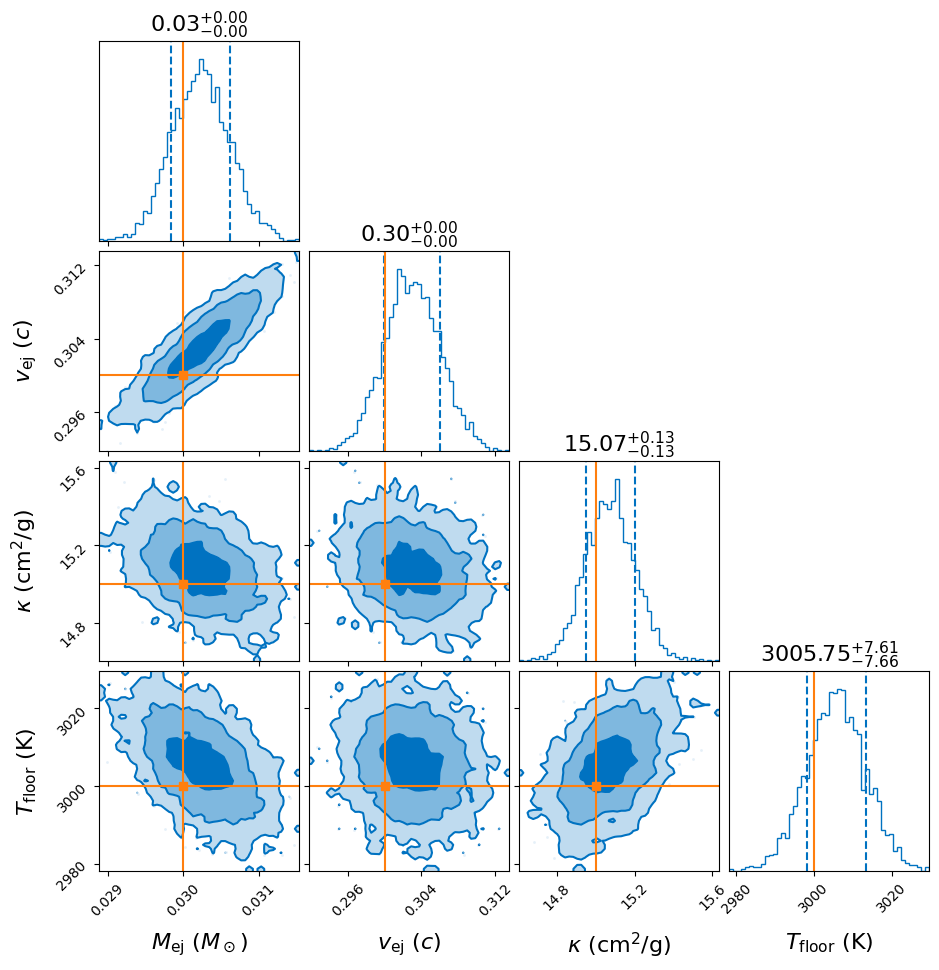

In [24]:
result1.plot_corner()

In [22]:
model_kwargs = dict(frequency=kn2.filtered_frequencies, output_format='flux_density')
result2 = redback.fit_model(transient=kn2, model=model, sampler='dynesty', model_kwargs=model_kwargs,
                           prior=priors, sample='rslice', nlive=1000, plot=False, resume=False, injection_parameters=parameters)


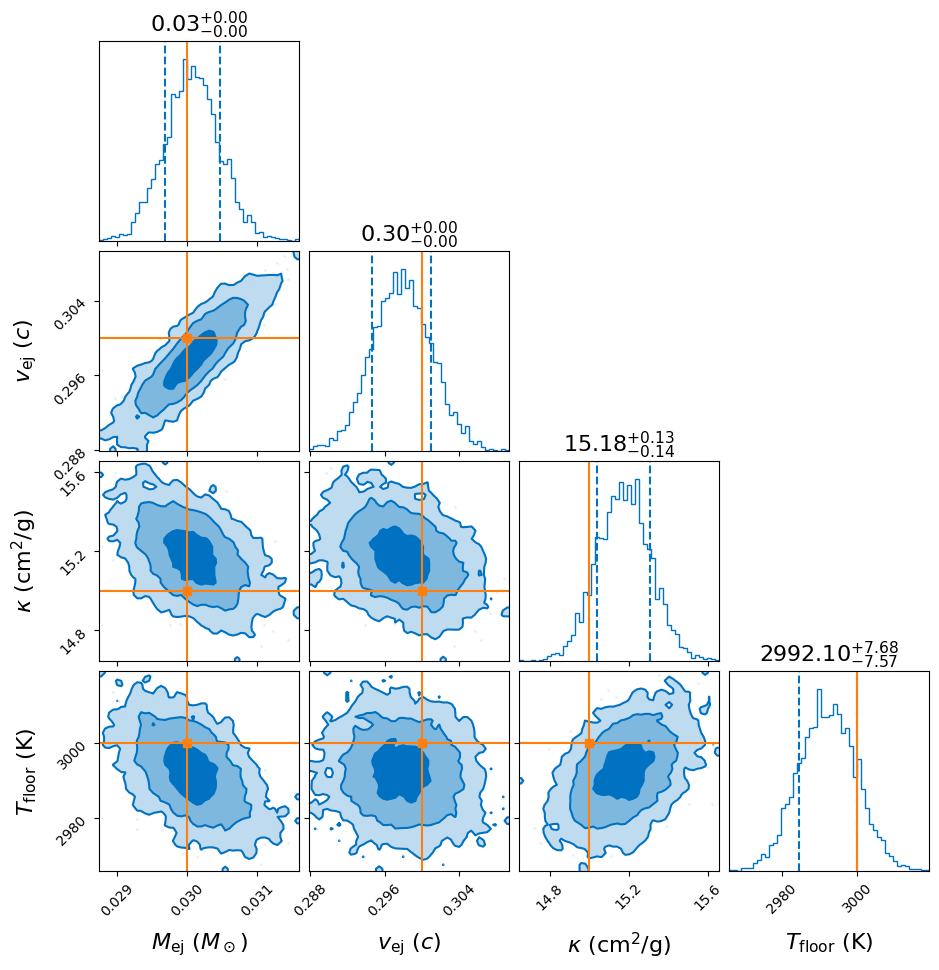

In [25]:
result2.plot_corner()

In [16]:
model_kwargs = dict(frequency=kn3.filtered_frequencies, output_format='flux_density')
result3 = redback.fit_model(transient=kn3, model=model, sampler='dynesty', model_kwargs=model_kwargs,
                           prior=priors, sample='rslice', nlive=1000, plot=False, resume=True, injection_parameters=parameters)


16:07 bilby INFO    : Running for label 'kn3', output will be saved to 'kilonova//one_component_kilonova_model'
16:07 bilby INFO    : Analysis priors:
16:07 bilby INFO    : mej=Uniform(minimum=0.01, maximum=0.05, name='mej', latex_label='$M_{\\mathrm{ej}}~(M_\\odot)$', unit=None, boundary=None)
16:07 bilby INFO    : vej=Uniform(minimum=0.1, maximum=0.5, name='vej', latex_label='$v_{\\mathrm{ej}}~(c)$', unit=None, boundary=None)
16:07 bilby INFO    : kappa=Uniform(minimum=1, maximum=30, name='kappa', latex_label='$\\kappa~(\\mathrm{cm}^{2}/\\mathrm{g})$', unit=None, boundary=None)
16:07 bilby INFO    : temperature_floor=LogUniform(minimum=100, maximum=6000, name='temperature_floor', latex_label='$T_{\\mathrm{floor}}~(\\mathrm{K})$', unit=None, boundary=None)
16:07 bilby INFO    : redshift=0.01
16:07 bilby INFO    : Analysis likelihood class: <class 'redback.likelihoods.GaussianLikelihood'>
16:07 bilby INFO    : Analysis likelihood noise evidence: -19153.704872445705
/home/wfw23/redback/

1it [00:00, ?it/s]

/home/wfw23/redback/redback/transient_models/kilonova_models.py:1418: RuntimeWarning: overflow encountered in exp
  
/home/wfw23/redback/redback/transient_models/kilonova_models.py:1418: RuntimeWarning: overflow encountered in multiply
  
/home/wfw23/redback/redback/transient_models/kilonova_models.py:1422: RuntimeWarning: invalid value encountered in multiply
  :param redshift: redshift
/home/wfw23/anaconda3/envs/myenv/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/wfw23/anaconda3/envs/myenv/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:472: RuntimeWarning: overflow encountered in multiply
  res = np.cumsum(d * (y[slice1] + y[slice2]) / 2.0, axis=axis)
/home/wfw23/redback/redback/transient_models/kilonova_models.py:1418: RuntimeWarning: overflow encountered in multiply
  
/home/wfw23/redback/redback/transient_models/kilonova_models

16:20 bilby INFO    : Summary of results:
nsamples: 3582
ln_noise_evidence: -19153.705
ln_evidence: 911.690 +/-  0.171
ln_bayes_factor: 20065.395 +/-  0.171



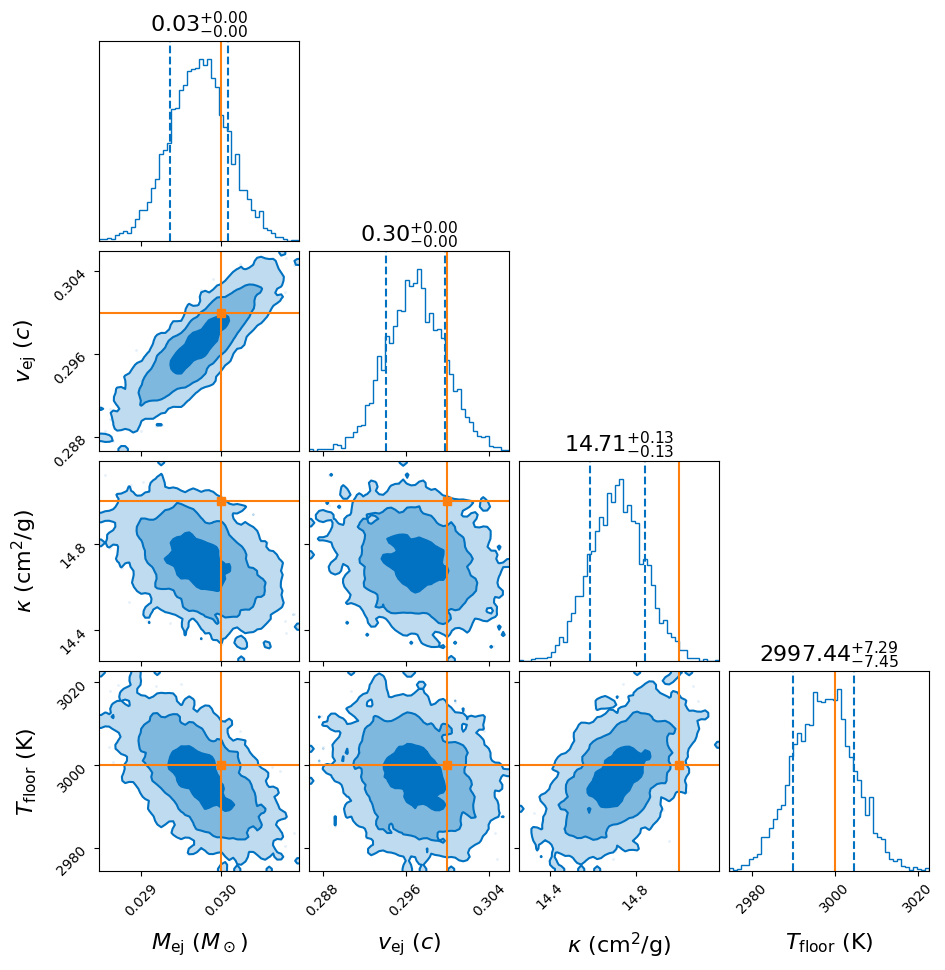

In [26]:
result3.plot_corner()

In [17]:
model_kwargs = dict(frequency=kn4.filtered_frequencies, output_format='flux_density')
result4 = redback.fit_model(transient=kn4, model=model, sampler='dynesty', model_kwargs=model_kwargs,
                           prior=priors, sample='rslice', nlive=1000, plot=False, resume=True, injection_parameters=parameters)


16:20 bilby INFO    : Running for label 'kn4', output will be saved to 'kilonova//one_component_kilonova_model'
16:20 bilby INFO    : Analysis priors:
16:20 bilby INFO    : mej=Uniform(minimum=0.01, maximum=0.05, name='mej', latex_label='$M_{\\mathrm{ej}}~(M_\\odot)$', unit=None, boundary=None)
16:20 bilby INFO    : vej=Uniform(minimum=0.1, maximum=0.5, name='vej', latex_label='$v_{\\mathrm{ej}}~(c)$', unit=None, boundary=None)
16:20 bilby INFO    : kappa=Uniform(minimum=1, maximum=30, name='kappa', latex_label='$\\kappa~(\\mathrm{cm}^{2}/\\mathrm{g})$', unit=None, boundary=None)
16:20 bilby INFO    : temperature_floor=LogUniform(minimum=100, maximum=6000, name='temperature_floor', latex_label='$T_{\\mathrm{floor}}~(\\mathrm{K})$', unit=None, boundary=None)
16:20 bilby INFO    : redshift=0.01
16:20 bilby INFO    : Analysis likelihood class: <class 'redback.likelihoods.GaussianLikelihood'>
16:20 bilby INFO    : Analysis likelihood noise evidence: -18913.882637736788
/home/wfw23/redback/

1it [00:00, ?it/s]

/home/wfw23/redback/redback/transient_models/kilonova_models.py:1418: RuntimeWarning: overflow encountered in multiply
  
/home/wfw23/redback/redback/transient_models/kilonova_models.py:1418: RuntimeWarning: overflow encountered in exp
  
/home/wfw23/redback/redback/transient_models/kilonova_models.py:1422: RuntimeWarning: invalid value encountered in multiply
  :param redshift: redshift
/home/wfw23/anaconda3/envs/myenv/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/wfw23/anaconda3/envs/myenv/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:472: RuntimeWarning: overflow encountered in multiply
  res = np.cumsum(d * (y[slice1] + y[slice2]) / 2.0, axis=axis)
/home/wfw23/redback/redback/transient_models/kilonova_models.py:1418: RuntimeWarning: overflow encountered in multiply
  
/home/wfw23/redback/redback/transient_models/kilonova_models

16:33 bilby INFO    : Summary of results:
nsamples: 3671
ln_noise_evidence: -18913.883
ln_evidence: 950.884 +/-  0.169
ln_bayes_factor: 19864.767 +/-  0.169



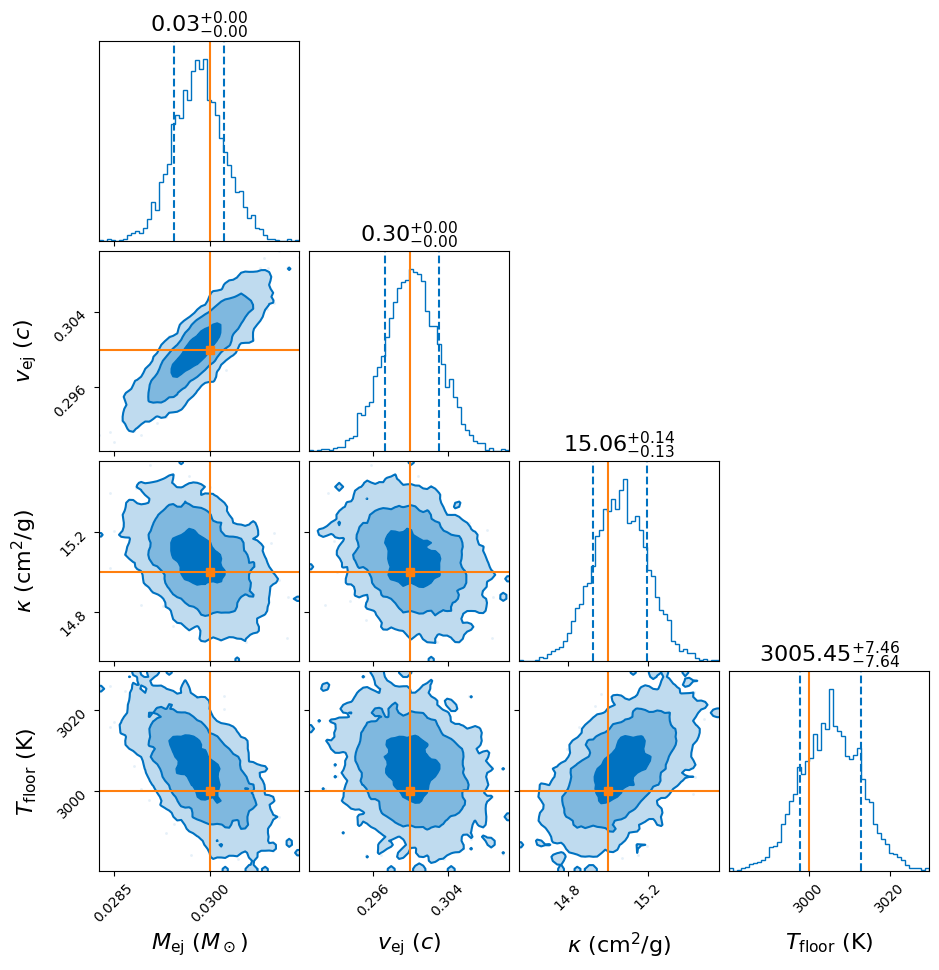

In [27]:
result4.plot_corner()

In [18]:
model_kwargs = dict(frequency=kn5.filtered_frequencies, output_format='flux_density')
result5 = redback.fit_model(transient=kn5, model=model, sampler='dynesty', model_kwargs=model_kwargs,
                           prior=priors, sample='rslice', nlive=1000, plot=False, resume=True, injection_parameters=parameters)


16:33 bilby INFO    : Running for label 'kn5', output will be saved to 'kilonova//one_component_kilonova_model'
16:33 bilby INFO    : Analysis priors:
16:33 bilby INFO    : mej=Uniform(minimum=0.01, maximum=0.05, name='mej', latex_label='$M_{\\mathrm{ej}}~(M_\\odot)$', unit=None, boundary=None)
16:33 bilby INFO    : vej=Uniform(minimum=0.1, maximum=0.5, name='vej', latex_label='$v_{\\mathrm{ej}}~(c)$', unit=None, boundary=None)
16:33 bilby INFO    : kappa=Uniform(minimum=1, maximum=30, name='kappa', latex_label='$\\kappa~(\\mathrm{cm}^{2}/\\mathrm{g})$', unit=None, boundary=None)
16:33 bilby INFO    : temperature_floor=LogUniform(minimum=100, maximum=6000, name='temperature_floor', latex_label='$T_{\\mathrm{floor}}~(\\mathrm{K})$', unit=None, boundary=None)
16:33 bilby INFO    : redshift=0.01
16:33 bilby INFO    : Analysis likelihood class: <class 'redback.likelihoods.GaussianLikelihood'>
16:33 bilby INFO    : Analysis likelihood noise evidence: -18571.765580588715
16:33 bilby INFO    

1it [00:00, ?it/s]

/home/wfw23/redback/redback/transient_models/kilonova_models.py:1418: RuntimeWarning: overflow encountered in exp
  
/home/wfw23/redback/redback/transient_models/kilonova_models.py:1418: RuntimeWarning: overflow encountered in multiply
  
/home/wfw23/redback/redback/transient_models/kilonova_models.py:1422: RuntimeWarning: invalid value encountered in multiply
  :param redshift: redshift
/home/wfw23/anaconda3/envs/myenv/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/wfw23/anaconda3/envs/myenv/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:472: RuntimeWarning: overflow encountered in multiply
  res = np.cumsum(d * (y[slice1] + y[slice2]) / 2.0, axis=axis)
/home/wfw23/redback/redback/transient_models/kilonova_models.py:1418: RuntimeWarning: overflow encountered in exp
  
/home/wfw23/redback/redback/transient_models/kilonova_models.py:1

16:47 bilby INFO    : Summary of results:
nsamples: 3678
ln_noise_evidence: -18571.766
ln_evidence: 955.831 +/-  0.170
ln_bayes_factor: 19527.597 +/-  0.170



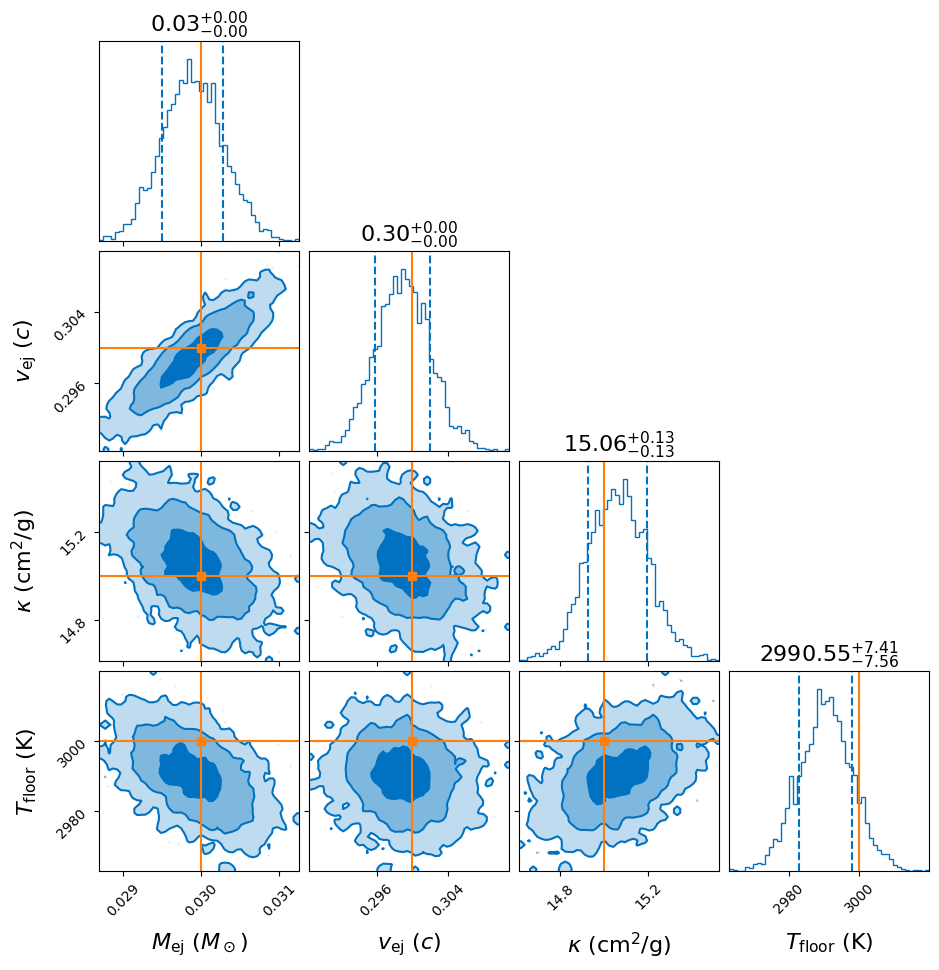

In [28]:
result5.plot_corner()